# Homework 2.2: The Quest For A Better Network

In this assignment you will build a monster network to solve CIFAR10 image classification.

This notebook is intended as a sequel to seminar 3, please give it a try if you haven't done so yet.

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +20% for describing your iteration path in a report below.
* +20% for building a network that gets above 20% accuracy
* +10% for beating each of these milestones on __TEST__ dataset:
    * 50% (50% points)
    * 60% (60% points)
    * 65% (70% points)
    * 70% (80% points)
    * 75% (90% points)
    * 80% (full points)
    
## Restrictions
* Please do NOT use pre-trained networks for this assignment until you reach 80%.
 * In other words, base milestones must be beaten without pre-trained nets (and such net must be present in the e-mail). After that, you can use whatever you want.
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

## Tips on what can be done:


 * __Network size__
   * MOAR neurons, 
   * MOAR layers, ([torch.nn docs](http://pytorch.org/docs/master/nn.html))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

   * Ph'nglui mglw'nafh Cthulhu R'lyeh wgah'nagl fhtagn!


### The main rule of prototyping: one change at a time
   * By now you probably have several ideas on what to change. By all means, try them out! But there's a catch: __never test several new things at once__.


### Optimization
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
   * You should certainly use adaptive optimizers
     * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (nn.BatchNorm2d) for the win!
     * Sometimes more batch normalization is better.
   * __Regularize__ to prevent overfitting
     * Add some L2 weight norm to the loss function, PyTorch will do the rest
       * Can be done manually or like [this](https://discuss.pytorch.org/t/simple-l2-regularization/139/2).
     * Dropout (`nn.Dropout`) - to prevent overfitting
       * Don't overdo it. Check if it actually makes your network better
   
### Convolution architectures
   * This task __can__ be solved by a sequence of convolutions and poolings with batch_norm and ReLU seasoning, but you shouldn't necessarily stop there.
   * [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions (exotic)](https://arxiv.org/abs/1608.06993), [Capsule networks (exotic)](https://arxiv.org/abs/1710.09829)
   * Please do try a few simple architectures before you go for resnet-152.
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment that you try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.
 
   
### Data augmemntation
   * getting 5x as large dataset for free is a great 
     * Zoom-in+slice = move
     * Rotate+zoom(to remove black stripes)
     * Add Noize (gaussian or bernoulli)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
     * Other cool libraries: cv2, skimake, PIL/Pillow
   * A more advanced way is to use torchvision transforms:
    ```
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
    trainset = torchvision.datasets.CIFAR10(root=path_to_cifar_like_in_seminar, train=True, download=True, transform=transform_train)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    ```
   * Or use this tool from Keras (requires theano/tensorflow): [tutorial](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), [docs](https://keras.io/preprocessing/image/)
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.
   
```

```

```

```

```

```

```

```


   
There is a template for your solution below that you can opt to use or throw away and write it your way.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cifar import load_cifar10
X_train,y_train,X_val,y_val,X_test,y_test = load_cifar10("cifar_data")
class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print(X_train.shape,y_train.shape)

Dataset not found. Downloading...
(40000, 3, 32, 32) (40000,)


In [3]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [134]:
model = nn.Sequential()

model.add_module("conv1", nn.Conv2d(3, 32, kernel_size=3, padding=1))
model.add_module("conv1_bn", nn.BatchNorm2d(32))
model.add_module("conv1_relu", nn.ReLU())
model.add_module("pool1", nn.MaxPool2d(2))
model.add_module("dp1", nn.Dropout2d(0.1))

model.add_module("conv2", nn.Conv2d(32, 64, kernel_size=3, padding=1))
model.add_module("conv2_bn", nn.BatchNorm2d(64))
model.add_module("conv2_relu", nn.ReLU())
model.add_module("pool2", nn.MaxPool2d(2))
model.add_module("dp2", nn.Dropout2d(0.1))

model.add_module("conv3", nn.Conv2d(64, 128, kernel_size=3, padding=1))
model.add_module("conv3_bn", nn.BatchNorm2d(128))
model.add_module("conv3_relu", nn.ReLU())
model.add_module("pool3", nn.MaxPool2d(2))
model.add_module("dp3", nn.Dropout2d(0.1))

model.add_module("conv4", nn.Conv2d(128, 256, kernel_size=3, padding=1))
model.add_module("conv4_bn", nn.BatchNorm2d(256))
model.add_module("conv4_relu", nn.ReLU())
model.add_module("pool4", nn.MaxPool2d(2))
model.add_module("dp4", nn.Dropout2d(0.1))

model.add_module("flatten", Flatten())

model.add_module("dense1_logits", nn.Linear(2*2*256, 128))
model.add_module("dense1_bn", nn.BatchNorm1d(128))
model.add_module("dense1_relu", nn.ReLU())
model.add_module("dense1_dp", nn.Dropout(0.6))

model.add_module("dense2_logits", nn.Linear(128, 10))

In [135]:
def compute_loss(X_batch, y_batch):
    X_batch = Variable(torch.FloatTensor(X_batch))
    y_batch = Variable(torch.LongTensor(y_batch))
    logits = model(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

__ Training __

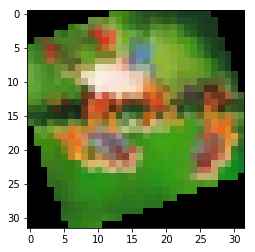

In [136]:
from torchvision import transforms
means = np.array((0.4914, 0.4822, 0.4465))
stds = np.array((0.2023, 0.1994, 0.2010))

transform_augment = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation([-30, 30]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

aug = transform_augment((np.transpose(X_train[0],(1, 2, 0)) * 255).astype(np.uint8)).numpy()
plt.imshow(((np.transpose(aug, (1,2,0)) * stds + means)* 255).astype(np.uint8));

In [137]:
def iterate_minibatches(X, y, batchsize):
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]
        yield X[ix], y[ix]
        
opt = torch.optim.Adam(model.parameters())

train_loss = []
val_accuracy = []

In [138]:
import time
num_epochs = 100 # total amount of full passes over training data
batch_size = 64  # number of samples processed in one SGD iteration

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    start_time = time.time()
    model.train(True) # enable dropout / batch_norm training behavior
    for X_batch, y_batch in iterate_minibatches(X_train, y_train, batch_size):
        X_batch = np.array([transform_augment((np.transpose(x,(1, 2, 0)) * 255).astype(np.uint8)).numpy() for x in X_batch])
        # train on batch
        loss = compute_loss(X_batch, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()
        train_loss.append(loss.data.numpy()[0])
        
    # And a full pass over the validation data:
    model.train(False) # disable dropout / use averages for batch_norm
    for X_batch, y_batch in iterate_minibatches(X_val, y_val, batch_size):
        X_batch = np.array([transform_test((np.transpose(x,(1, 2, 0)) * 255).astype(np.uint8)).numpy() for x in X_batch])
        logits = model(Variable(torch.FloatTensor(X_batch)))
        y_pred = logits.max(1)[1].data.numpy()
        val_accuracy.append(np.mean(y_batch == y_pred))

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration): \t{:.6f}".format(
        np.mean(train_loss[-len(X_train) // batch_size :])))
    print("  validation accuracy: \t\t\t{:.2f} %".format(
        np.mean(val_accuracy[-len(X_val) // batch_size :]) * 100))

Epoch 1 of 100 took 113.205s
  training loss (in-iteration): 	1.783646
  validation accuracy: 			49.56 %
Epoch 2 of 100 took 121.702s
  training loss (in-iteration): 	1.535484
  validation accuracy: 			55.02 %
Epoch 3 of 100 took 118.269s
  training loss (in-iteration): 	1.422615
  validation accuracy: 			60.79 %
Epoch 4 of 100 took 124.361s
  training loss (in-iteration): 	1.351170
  validation accuracy: 			62.51 %
Epoch 5 of 100 took 115.373s
  training loss (in-iteration): 	1.280668
  validation accuracy: 			64.83 %
Epoch 6 of 100 took 116.907s
  training loss (in-iteration): 	1.238560
  validation accuracy: 			66.77 %
Epoch 7 of 100 took 109.538s
  training loss (in-iteration): 	1.203813
  validation accuracy: 			68.08 %
Epoch 8 of 100 took 109.480s
  training loss (in-iteration): 	1.172176
  validation accuracy: 			70.42 %
Epoch 9 of 100 took 117.892s
  training loss (in-iteration): 	1.137985
  validation accuracy: 			69.98 %
Epoch 10 of 100 took 117.855s
  training loss (in-itera

KeyboardInterrupt: 

In [139]:
model.train(False) # disable dropout / use averages for batch_norm
test_batch_acc = []
for X_batch, y_batch in iterate_minibatches(X_test, y_test, 500):
    X_batch = np.array([transform_test((np.transpose(x,(1, 2, 0)) * 255).astype(np.uint8)).numpy() for x in X_batch])
    logits = model(Variable(torch.FloatTensor(X_batch)))
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))

test_accuracy = np.mean(test_batch_acc)
    
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

if test_accuracy * 100 > 95:
    print("Double-check, than consider applying for NIPS'17. SRSly.")
elif test_accuracy * 100 > 90:
    print("U'r freakin' amazin'!")
elif test_accuracy * 100 > 80:
    print("Achievement unlocked: 110lvl Warlock!")
elif test_accuracy * 100 > 70:
    print("Achievement unlocked: 80lvl Warlock!")
elif test_accuracy * 100 > 60:
    print("Achievement unlocked: 70lvl Warlock!")
elif test_accuracy * 100 > 50:
    print("Achievement unlocked: 60lvl Warlock!")
else:
    print("We need more magic! Follow instructons below")

Final results:
  test accuracy:		81.54 %
Achievement unlocked: 110lvl Warlock!


```

```

```

```

```

```


# Report

All creative approaches are highly welcome, but at the very least it would be great to mention
* the idea;
* brief history of tweaks and improvements;
* what is the final architecture and why?
* what is the training method and, again, why?
* Any regularizations and other techniques applied and their effects;


There is no need to write strict mathematical proofs (unless you want to).
 * "I tried this, this and this, and the second one turned out to be better. And i just didn't like the name of that one" - OK, but can be better
 * "I have analized these and these articles|sources|blog posts, tried that and that to adapt them to my problem and the conclusions are such and such" - the ideal one
 * "I took that code that demo without understanding it, but i'll never confess that and instead i'll make up some pseudoscientific explaination" - __not_ok__

By the points below I mention validation accuracy

The optimization method was Adam(lr=1e-3) each time

### 1. 70%

Start with 2 convolutional layers (followed by BN, ReLU and MaxPooling) and dense one

### 2. 74% - added one dense layer

### 3.  77% - added one CNN layer

### 4. 75% (rollback) - increased batch size to 256

### 5. 77% - added another CNN layer

### 6. 78% - increased dropout after dense layer to 0.7

### 7. 80% - added 0.2 dropout after each pooling

### 8.  ? - used training time augmentation

too slow convergence

### 9. 81% - used training time augmentation + decreased all dropouts by 0.1

Let's evaluate the model on training sample

In [141]:
model.train(False) # disable dropout / use averages for batch_norm
test_batch_acc = []
for X_batch, y_batch in iterate_minibatches(X_train, y_train, 500):
    X_batch = np.array([transform_test((np.transpose(x,(1, 2, 0)) * 255).astype(np.uint8)).numpy() for x in X_batch])
    logits = model(Variable(torch.FloatTensor(X_batch)))
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))

test_accuracy = np.mean(test_batch_acc)
    
print("  train accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

  train accuracy:		85.21 %


### Hi, my name is `Ilya Ivanov`, and here's my story

A long time ago in a galaxy far far away, when it was still more than an hour before the deadline, i got an idea:

##### I gonna build a neural network, that
* predicts the class of an image
* belongs to CNN architectures family
* because this was the task

How could i be so naive?!

##### One day, with no signs of warning,
This thing has finally converged and
* achieved 81.5% test accuracy
* all worked except big batch size


Each of the following enhancements brought several percent of validation accuracy:
* additional dense layer
* additional convolutional layers
* dropout after pooling layers
* training time data augmentation

##### Finally, after 9  iterations
* the final architecture is above in the code (4 CNN layers + 2 Dense with BN, MaxPooling, Dropout)
* training time data augmentation is used
* opt. method is Adam with default learning rate (1e-3)

That, having wasted 2 hours of my life training, got

* accuracy on training: 85.21 %
* accuracy on validation: 81.83 %
* accuracy on test: 81.54 %